Successfully loaded: titanic_train.csv



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

### Descriptive statistics for numerical columns:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



### Missing values per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

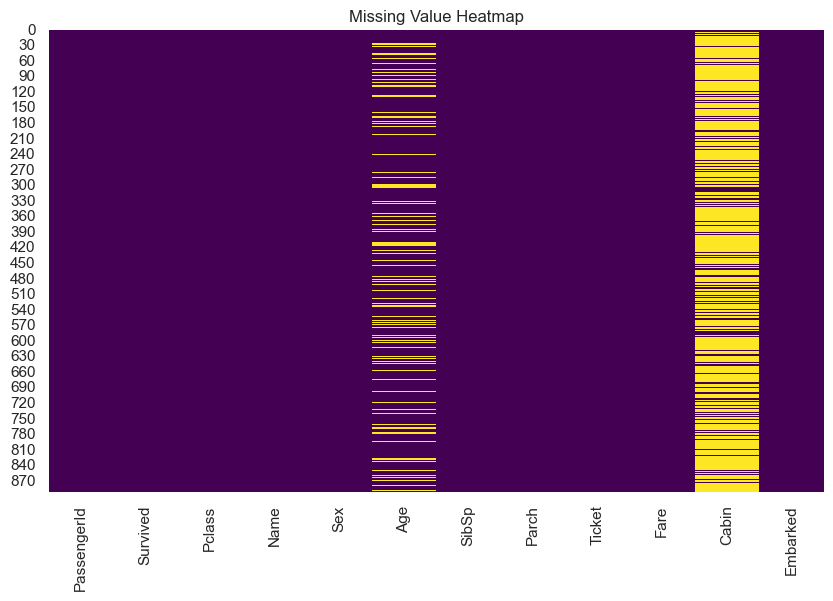


### Exploring Categorical Columns:

- **Name:** 891 unique values
  Top 10 Value Counts:


Name
Braund, Mr. Owen Harris                            1
Boulos, Mr. Hanna                                  1
Frolicher-Stehli, Mr. Maxmillian                   1
Gilinski, Mr. Eliezer                              1
Murdlin, Mr. Joseph                                1
Rintamaki, Mr. Matti                               1
Stephenson, Mrs. Walter Bertram (Martha Eustis)    1
Elsbury, Mr. William James                         1
Bourke, Miss. Mary                                 1
Chapman, Mr. John Henry                            1
Name: count, dtype: int64

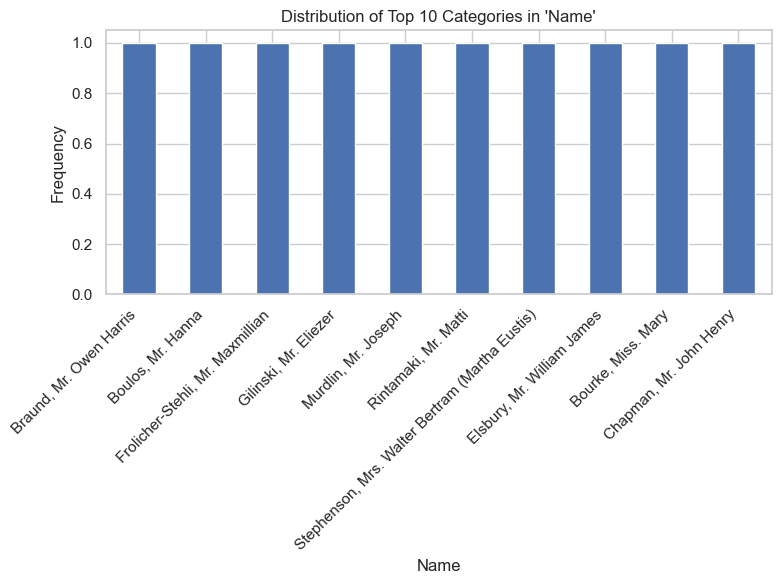


- **Sex:** 2 unique values
  Values: ['male' 'female']
  Top 10 Value Counts:


Sex
male      577
female    314
Name: count, dtype: int64

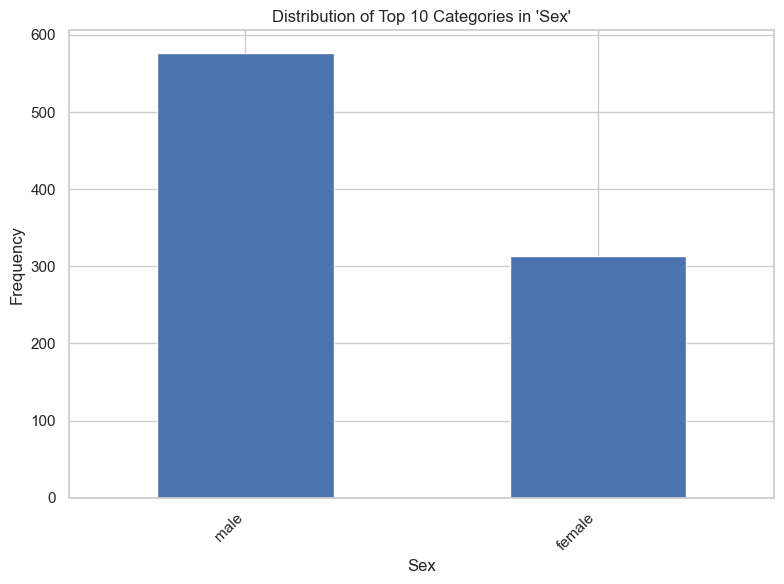


- **Ticket:** 681 unique values
  Top 10 Value Counts:


Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

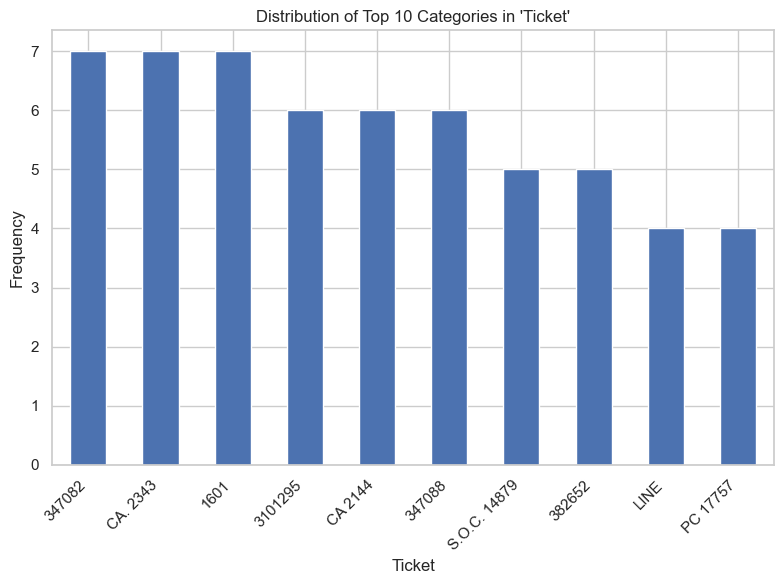


- **Cabin:** 147 unique values
  Top 10 Value Counts:


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
F2             3
E101           3
D              3
C78            2
C93            2
Name: count, dtype: int64

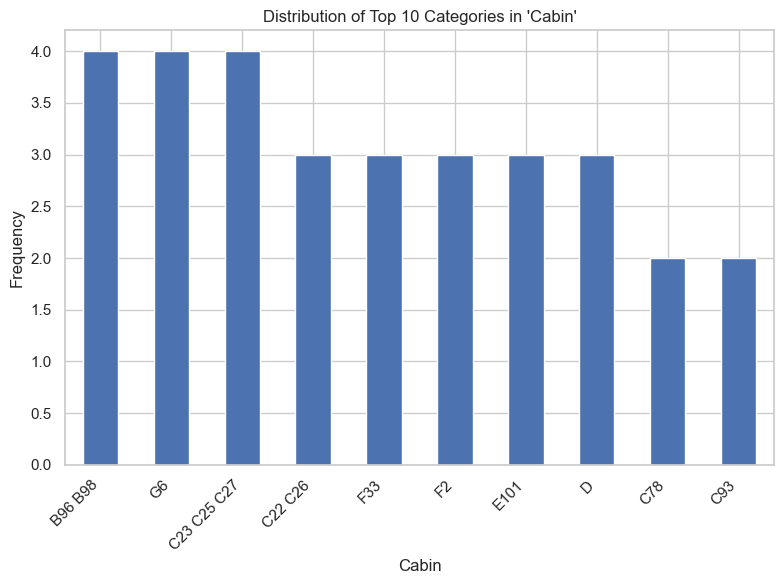


- **Embarked:** 3 unique values
  Values: ['S' 'C' 'Q' nan]
  Top 10 Value Counts:


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

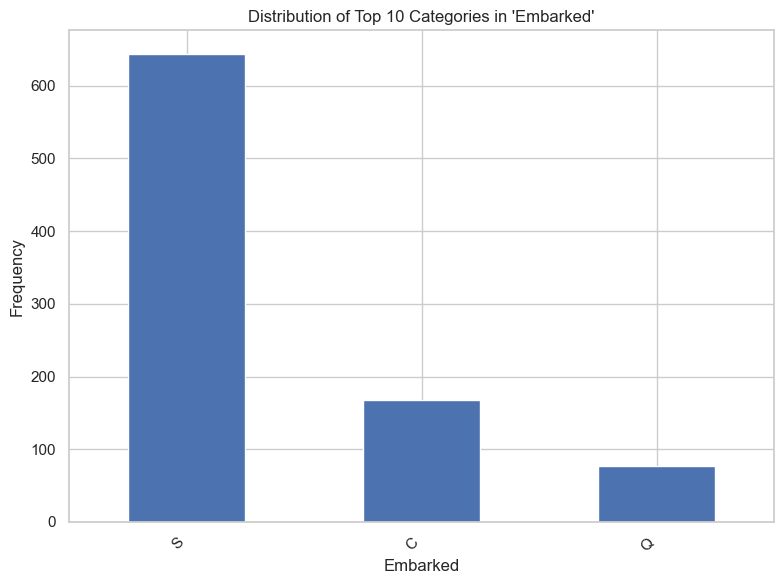


### Exploring Numerical Columns:

- **PassengerId:**


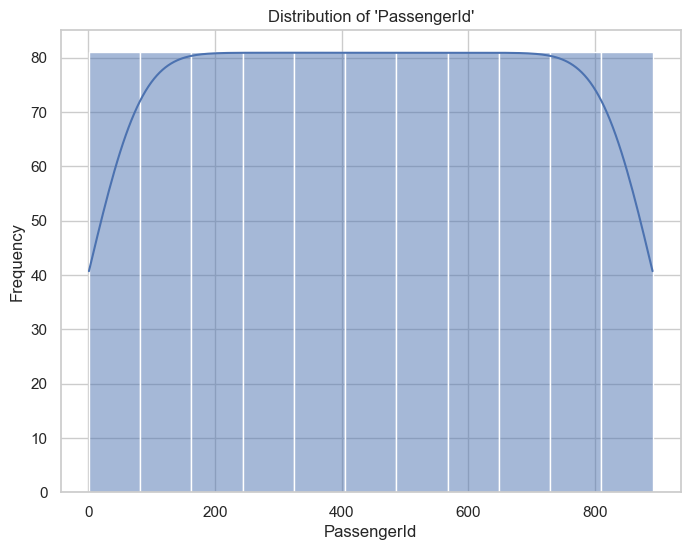

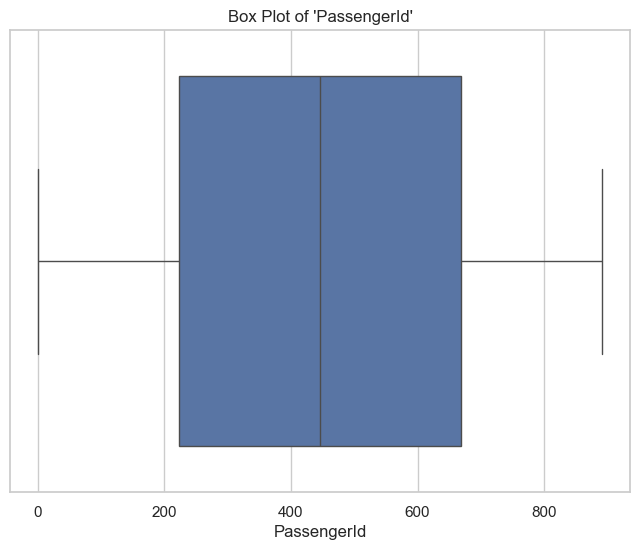


- **Survived:**


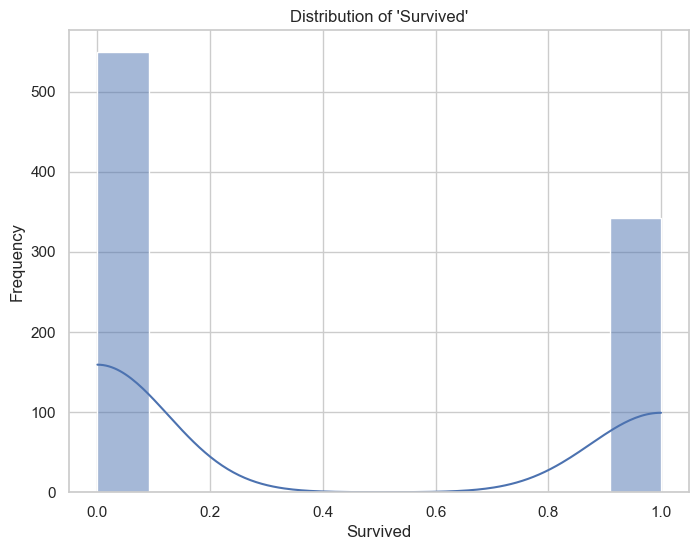

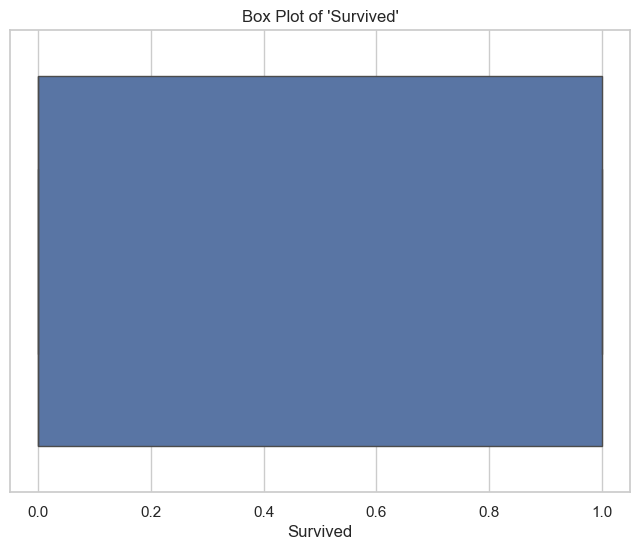


- **Pclass:**


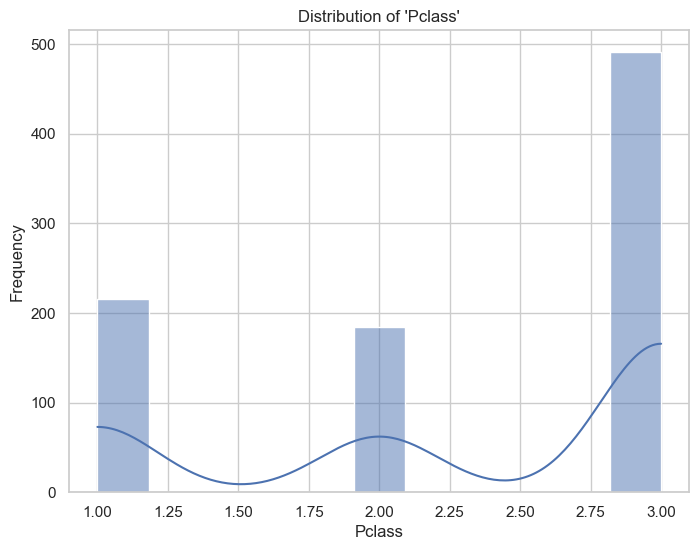

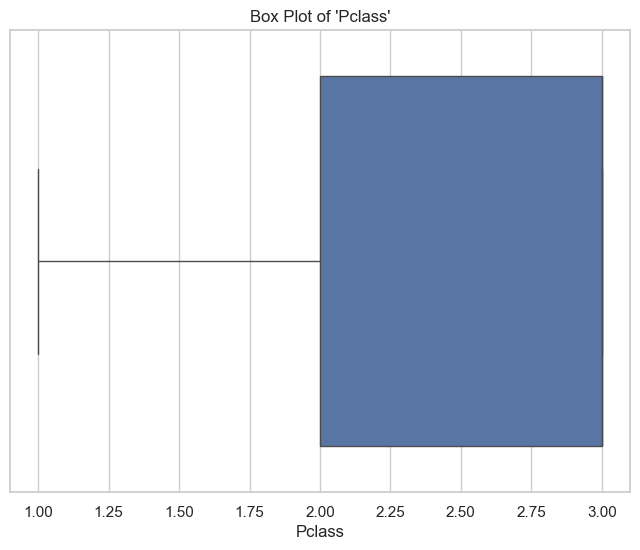


- **Age:**


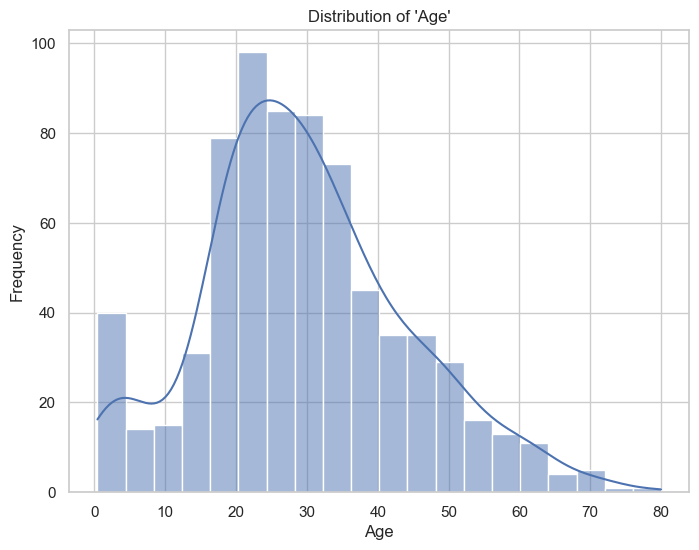

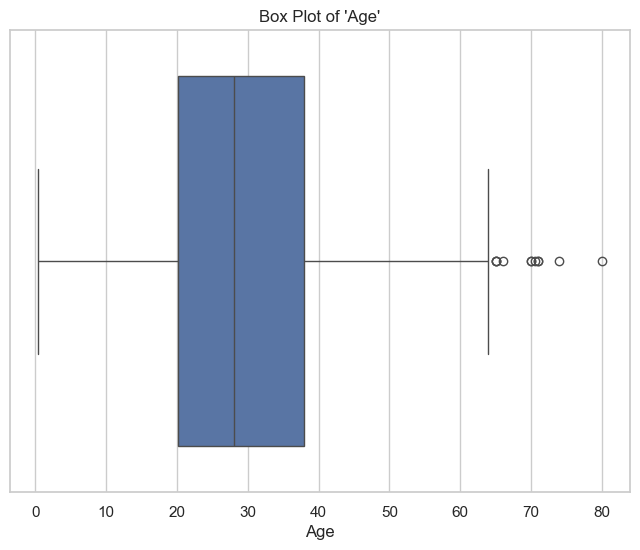


- **SibSp:**


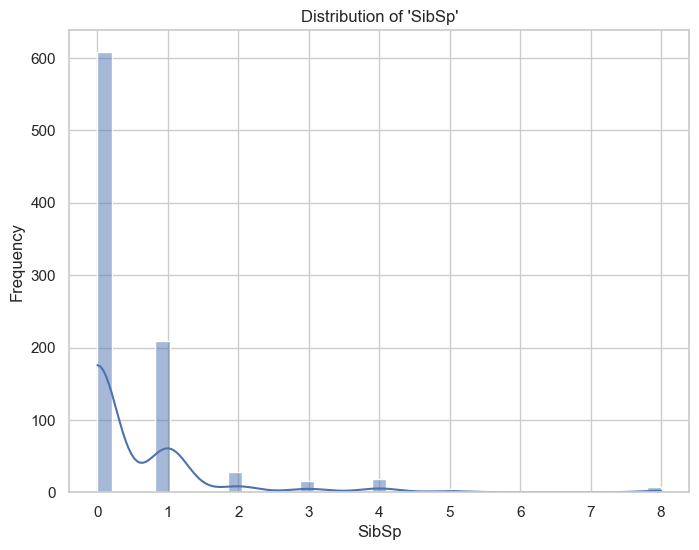

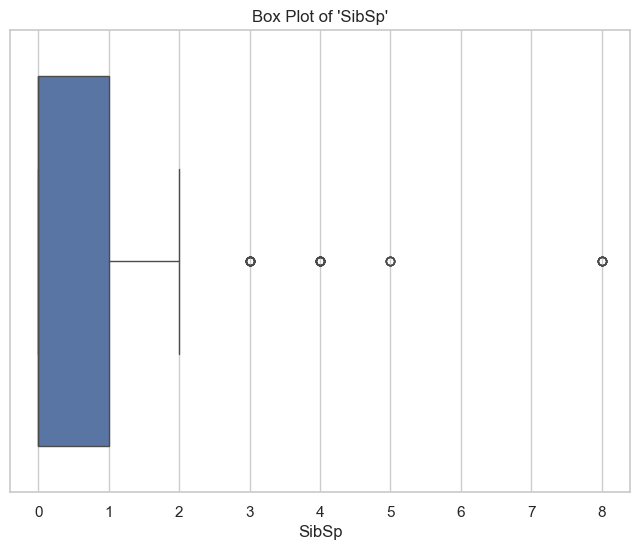


- **Parch:**


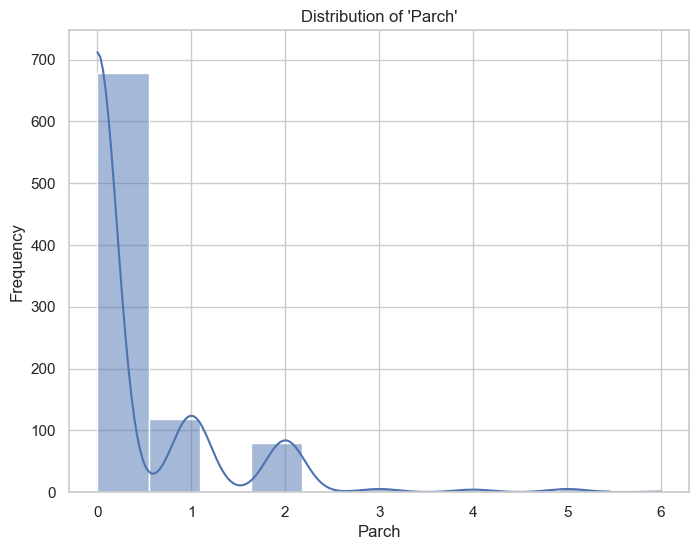

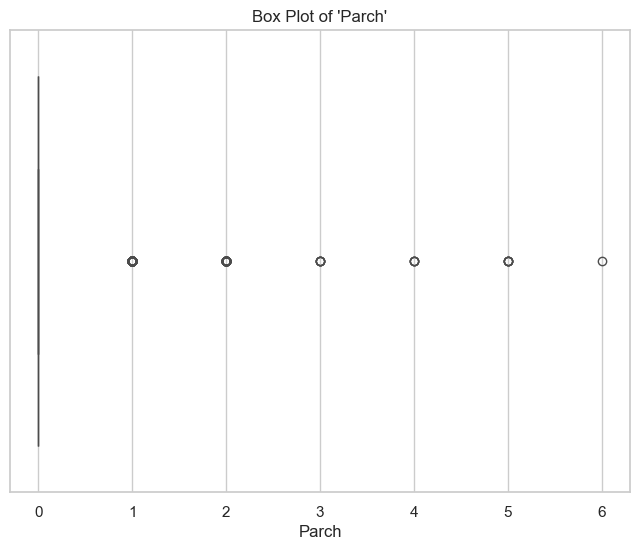


- **Fare:**


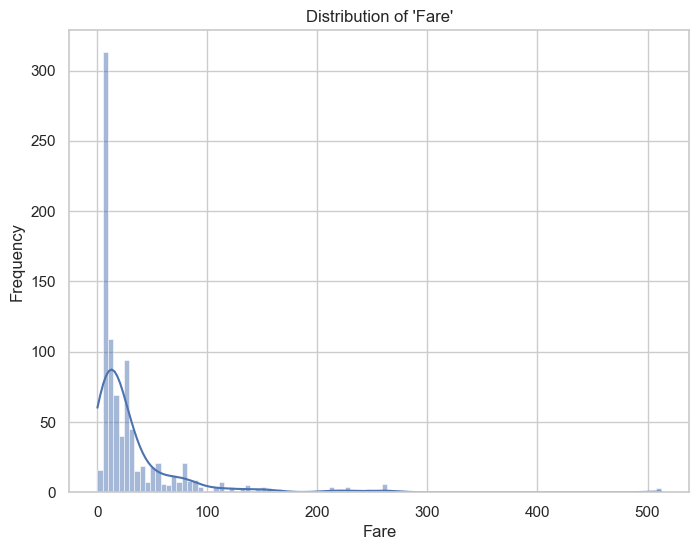

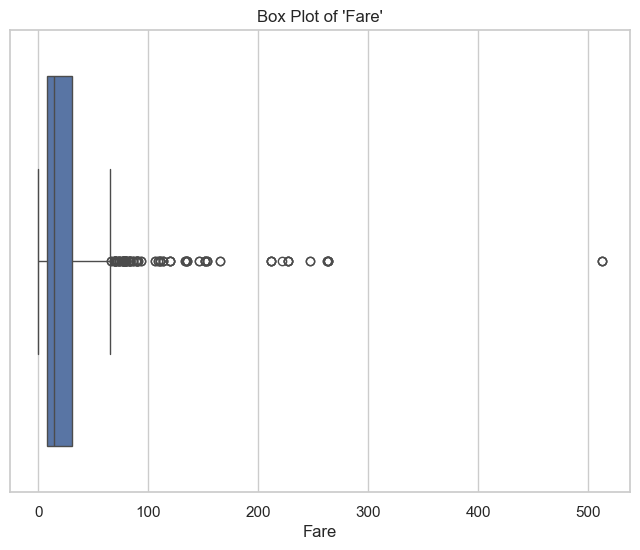


### Pairwise Relationships (Scatter Plots for Numerical Columns):


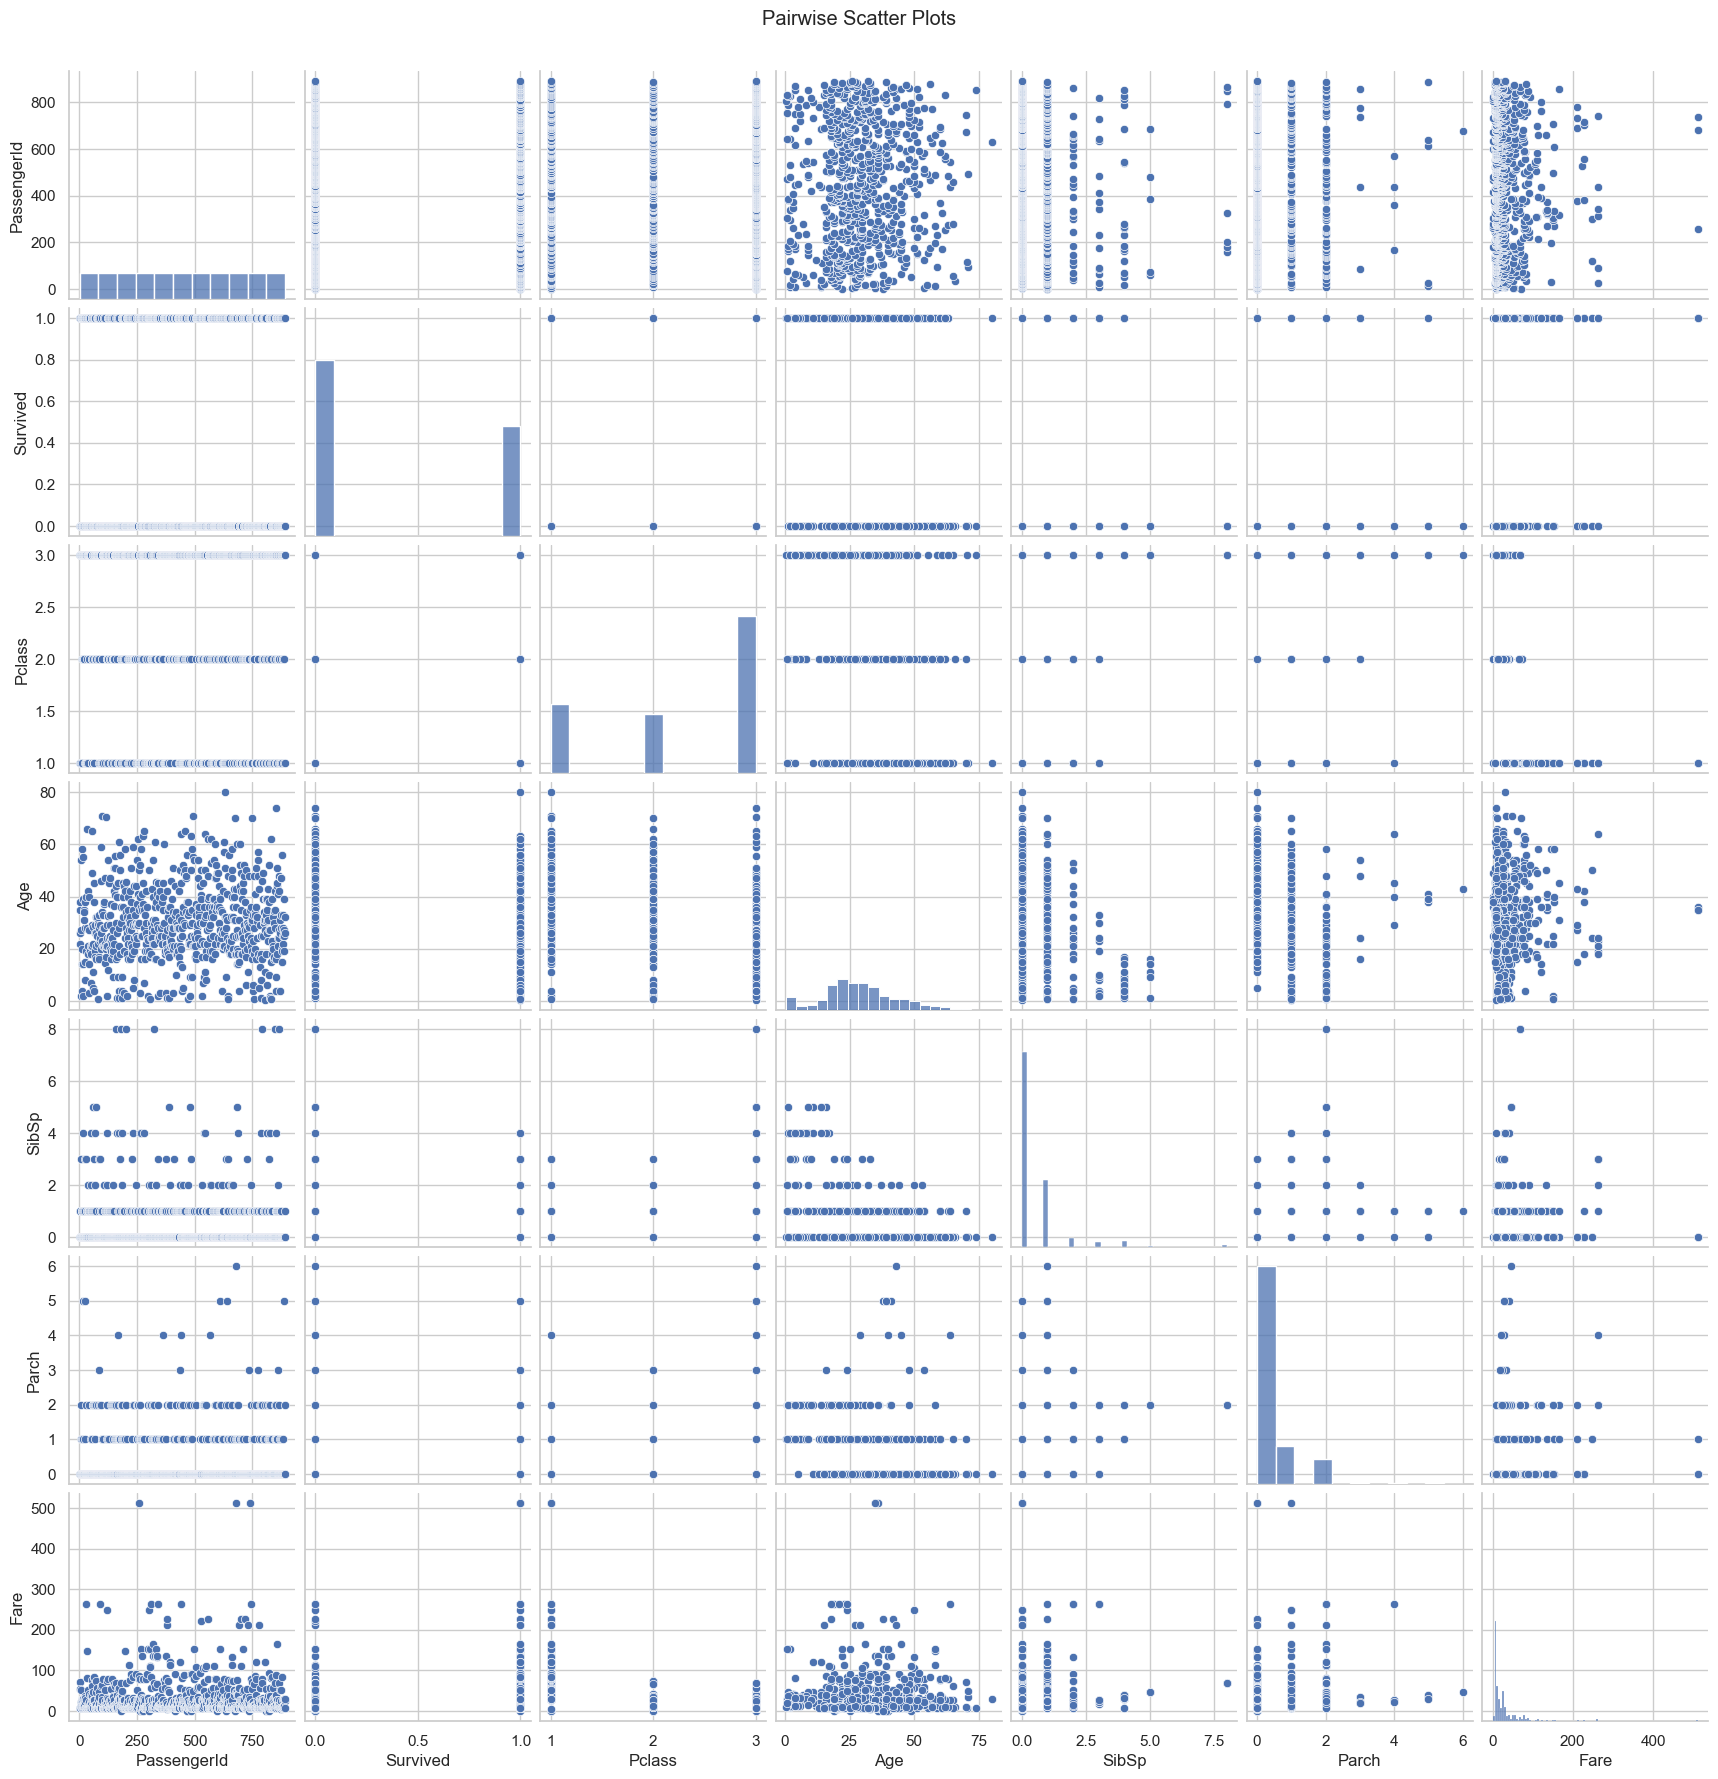


### Correlation Heatmap for Numerical Columns:


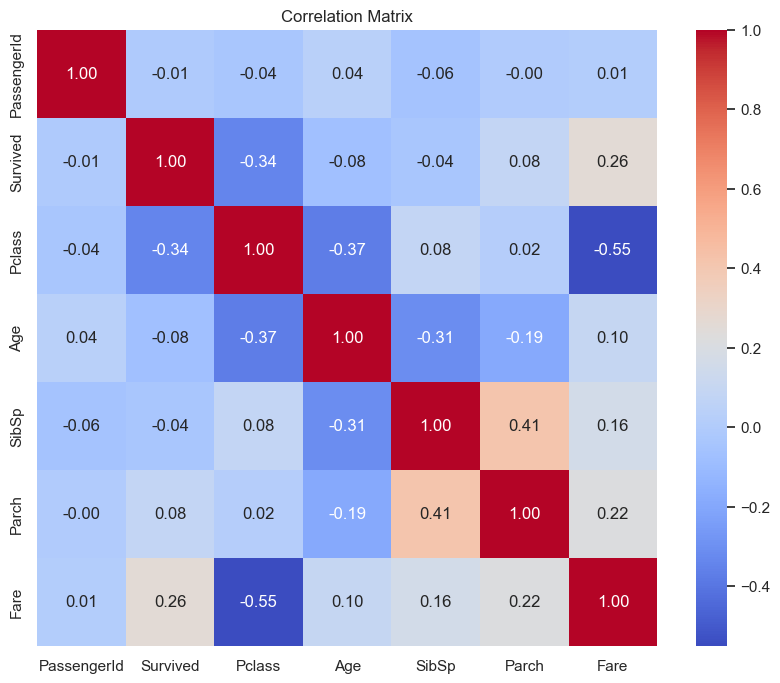

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def perform_eda_jupyter(csv_filepath):
    try:
        df = pd.read_csv(csv_filepath)
        print(f"Successfully loaded: {csv_filepath}\n")
        display(df.head())
        print("\n### Information about the DataFrame:")
        df.info()
        print("\n### Descriptive statistics for numerical columns:")
        display(df.describe())
        print("\n### Missing values per column:")
        display(df.isnull().sum())
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title("Missing Value Heatmap")
        plt.show()
        categorical_cols = df.select_dtypes(include=['object']).columns
        if not categorical_cols.empty:
            print("\n### Exploring Categorical Columns:")
            for col in categorical_cols:
                unique_count = df[col].nunique()
                print(f"\n- **{col}:** {unique_count} unique values")
                if unique_count <= 20:
                    print(f"  Values: {df[col].unique()}")
                print(f"  Top 10 Value Counts:")
                display(df[col].value_counts().head(10))
                plt.figure(figsize=(8, 6))
                df[col].value_counts().head(10).plot(kind='bar')
                plt.title(f"Distribution of Top 10 Categories in '{col}'")
                plt.xlabel(col)
                plt.ylabel("Frequency")
                plt.xticks(rotation=45, ha='right')
                plt.tight_layout()
                plt.show()
        else:
            print("\nNo categorical columns found.")
        numerical_cols = df.select_dtypes(include=['number']).columns
        if not numerical_cols.empty:
            print("\n### Exploring Numerical Columns:")
            for col in numerical_cols:
                print(f"\n- **{col}:**")
                plt.figure(figsize=(8, 6))
                sns.histplot(df[col], kde=True)
                plt.title(f"Distribution of '{col}'")
                plt.xlabel(col)
                plt.ylabel("Frequency")
                plt.show()
                plt.figure(figsize=(8, 6))
                sns.boxplot(x=df[col])
                plt.title(f"Box Plot of '{col}'")
                plt.xlabel(col)
                plt.show()
        else:
            print("\nNo numerical columns found.")
        if len(numerical_cols) > 1:
            print("\n### Pairwise Relationships (Scatter Plots for Numerical Columns):")
            sns.pairplot(df[numerical_cols.tolist()])
            plt.suptitle("Pairwise Scatter Plots", y=1.02)
            plt.show()
        if len(numerical_cols) > 1:
            print("\n### Correlation Heatmap for Numerical Columns:")
            correlation_matrix = df[numerical_cols.tolist()].corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
            plt.title("Correlation Matrix")
            plt.show()
    except FileNotFoundError:
        print(f"Error: File not found at {csv_filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

file_path = 'titanic_train.csv'
perform_eda_jupyter(file_path)